<a href="https://colab.research.google.com/github/muscak/Linear-Regression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this study is to learn about multiple linear regression using Stats Model package. It's mainly based on the data and code of "The Data Science Course 2022: Complete Data Science Bootcamp" in Udemy.

In [1]:
import pandas as pd             # Allows us to organize data in a tabular form and to attach descriptive labels to the rows and columns.
import numpy as np              # A third party package allowing us to work with multi-dimensional arryas.
import matplotlib.pyplot as plt # A 2D plotting library especially designed for visualization of NumPy computaions.
import statsmodels.api as sm    # A package built on top of NumPy and Scipy (mathematics, machine learning etc.) which integrates with Pandas.

# Libraries to connect a data file in the google drive to create the model on Google Colab.
# While working on local computer no need for these libraries. 
from google.colab import files
from google.colab import drive

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/gdrive') # While working on local computer no need for this function. 

# Special function to read and parse a .csv file and parse it. To see the structure type: pd.read_csv?
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Linear Regression/Data/real_estate_price_size_year.csv')
df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [4]:
df.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


As `describe()` method shows we have 100 observations that shows the price of a house along with it's size and the year that it's build.

We'll create a linear regression which predicts price of the house based on it's size and year.

##Creating Regression

$\hat{y}= b_0 + b_1.x_1 + b_2.x_2$ <br>.

We'll find the $b_0$, $b_1$ and $b_2$ which can predict the price using the given size and year as correct as possible.

In [5]:
# Define the dependent and independent variables (regressors)
y = df['price']
x1 = df[['size','year']]

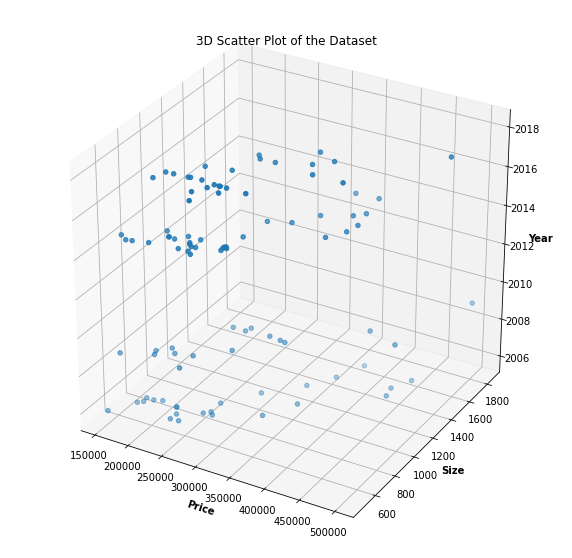

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['price'], df['size'], df['year'])
plt.title("3D Scatter Plot of the Dataset")
ax.set_xlabel('Price', fontweight ='bold')
ax.set_ylabel('Size', fontweight ='bold')
ax.set_zlabel('Year', fontweight ='bold')
plt.show()

In [11]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           2.77e-32
Time:                        08:28:07   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As per the above summary table:<br>
$b_0 = 5772000$<br>
$b_1 = 227.7009$<br>
$b_2 = 2916.7853$<br><br>

$\hat{y} = 5772000 + 227.7009*x_1 + 2916.7853*x_2$